# Optimized Motor Carrier Selection at WestVaco

## Introduction
#### Sabrina Rodriguez
Westvaco Company is a manufacturer that sells paper, paperboard, and specialty chemicals. We are focusing in the distribution problem shown in the table below. planned loads are turned over to a transportation planner to assign carriers to loads, with different rates to each destination served. The planner will select a carrier for a given shipment based on the minimize cost, and subject to availability, and commitments. For the distribution data we will find the least-cost assignment of truckloads to carriers that meets the necessary requirements, and the cost of this distribution plan

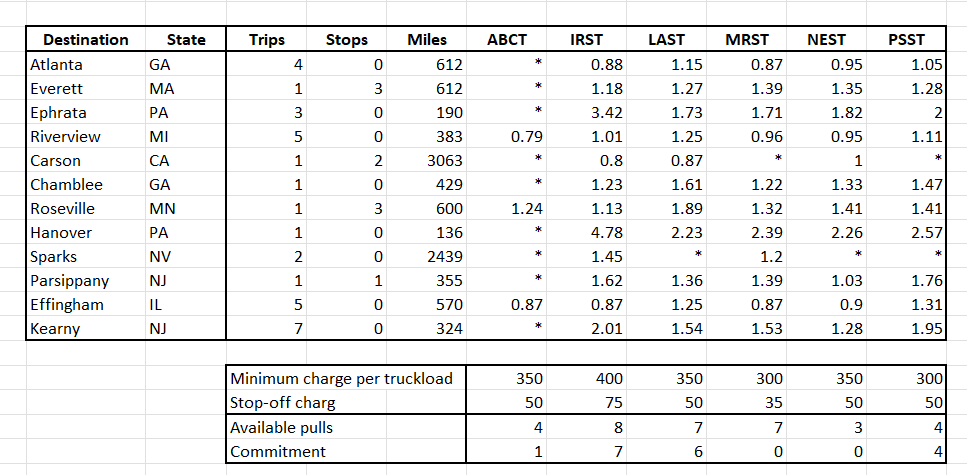

##  Model

In [1]:
from gurobipy import *
import math 
from operator import itemgetter
import pandas as pd
import numpy as np

### Data

In [3]:
b = Model("Rout Planning")

stops = [0,3,0,0,2,0,3,0,0,1,0,0]
miles = [612, 612, 190, 383, 3063, 429, 600, 136, 2439, 355, 570, 324]

mincharge = [350, 400, 350, 300, 350, 300]
stopcharg = [50, 75, 50, 35, 50, 50]

trips = [4,1,3,5,1,1,1,1,2,1,5,7]
required = [1, 7, 6, 0, 0, 4]
availible = [4, 8, 7, 7, 3, 4]

Atlanta = [1000000,0.88,1.15,0.87,0.95,1.05]
Everett = [1000000,1.18,1.27,1.39,1.35,1.28]
Ephrata = [1000000,3.42,1.73,1.71,1.82,2.00]
Riverview = [0.79,1.01,1.25,0.96,0.95,1.11]
Carson = [1000000,0.80,0.87,1000000,1.00,1000000]
Chamblee = [1000000,1.23,1.61,1.22,1.33,1.47]
Roseville = [1.24,1.13,1.89,1.32,1.41,1.41]
Hanover = [1000000,4.78,2.23,2.39,2.26,2.57]
Sparks = [1000000,1.45,1000000,1.20,1000000,1000000]
Parsippany = [1000000,1.62,1.36,1.39,1.03,1.76]
Effingham = [0.87,0.87,1.25,0.87,0.90,1.31]
Kearny = [1000000,2.01,1.54,1.53,1.28,1.95]

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-28


### Decision Variables

In [4]:
N = 6
medio = ['Atlanta', 'Everett', 'Ephrata', 'Riverview', 'Carson', 'Chamblee', 'Roseville', 'Hanover', 'Sparks', 'Parsippany', 'Effingham', 'Kearny']
Regular = ['ABCT','IRST','LAST','MRST','NEST', 'PSST']

var1 = []
for i in range(N):
    var1.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))
b.update()

var2 = []
for i in range(N):
    var2.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))
    
var3 = []
for i in range(N):
    var3.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))

var4 = []
for i in range(N):
    var4.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))
b.update()

var5 = []
for i in range(N):
    var5.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))
    
var6 = []
for i in range(N):
    var6.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))

var7 = []
for i in range(N):
    var7.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))

var8 = []
for i in range(N):
    var8.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))
    
var9 = []
for i in range(N):
    var9.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))

var10 = []
for i in range(N):
    var10.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))
b.update()

var11 = []
for i in range(N):
    var11.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))
    
var12 = []
for i in range(N):
    var12.append(b.addVar(vtype=GRB.CONTINUOUS, lb = 0.0, name = Regular[i]))
    
b.update()

### Objective

In [5]:
variables = [var1, var2, var3, var4, var5, var6, var7, var8, var9, var10, var11, var12]
costs = [Atlanta, Everett, Ephrata, Riverview, Carson, Chamblee, Roseville, Hanover, Sparks, Parsippany, Effingham, Kearny]
def cost(to, po, t):
    for m in range(len(to)):
        to[m] = to[m]*po+t*stopcharg[m]
        if  to[m] < mincharge[m]:
            to[m]= mincharge[m]
            
cost(Atlanta, miles[0], stops[0])
cost(Everett, miles[1], stops[1])
cost(Ephrata, miles[2], stops[2])
cost(Riverview, miles[3], stops[3])
cost(Carson, miles[4], stops[4])
cost(Chamblee, miles[5], stops[5])
cost(Roseville, miles[6], stops[6])
cost(Hanover, miles[7], stops[7])
cost(Sparks, miles[8], stops[8])
cost(Parsippany,miles[9], stops[9])
cost(Effingham, miles[10], stops[10])
cost(Kearny, miles[11], stops[11])
totalcost = [Atlanta, Everett, Ephrata, Riverview, Carson, Chamblee, Roseville, Hanover, Sparks, Parsippany, Effingham, Kearny]

In [6]:
b.setObjective(quicksum(variables[i][j]*totalcost[i][j] for j in range(len(variables[i])) for i in range(len(variables))), GRB.MINIMIZE)
b.update()

### Constraints

In [7]:
for j in range(len(costs[0])):
    b.addConstr(quicksum(variables[i][j] for i in range(len(costs))), GRB.LESS_EQUAL, availible[j])
for j in range(len(costs[0])):    
    b.addConstr(required[j], GRB.LESS_EQUAL, quicksum(variables[i][j] for i in range(len(costs))))
for i in range(len(costs)):
    b.addConstr(quicksum(variables[i][j] for j in range(len(costs[i]))), GRB.EQUAL, trips[i])
b.update()

### Optimization

In [8]:
b.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 24 rows, 72 columns and 216 nonzeros
Model fingerprint: 0x827e865e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+02, 3e+09]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 8e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 6 rows and 0 columns
Presolve time: 0.01s
Presolved: 18 rows, 75 columns, 147 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1776310e+04   2.399100e+01   0.000000e+00      0s
      17    2.2394380e+04   0.000000e+00   0.000000e+00      0s

Solved in 17 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.239438000e+04


### Results

In [10]:
b.setParam('OutputFlag', False)
b.optimize()
print(f" The total cost is: {b.objVal:,.0f}$")
m = b.getAttr(GRB.Attr.X, b.getVars())
df = pd.DataFrame(list(zip(m[0:6], m[6:12], m[12:18], m[18:24], m[24:30], m[30:36], m[36:42], 
                           m[42:48], m[48:54], m[54:60], m[60:66], m[66:72])), 
                  index = Regular, 
                  columns = medio)
df

 The total cost is: 22,394$


,Atlanta,Everett,Ephrata,Riverview,Carson,Chamblee,Roseville,Hanover,Sparks,Parsippany,Effingham,Kearny
ABCT,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IRST,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0
LAST,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
MRST,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
NEST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
PSST,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##  Recommendation
After taking into considerations the comminments, and availability, and the rates that included a mileage charge, a stop-off 
charge, and a minimum charge per truckload, it was possible to find a distribution plan with the lowest cost. Minimizing the cost of this distribution plan, the truckloads to carriers assignment would look the following way:
* ABCT to Riverview
* IRST to Carson, Chamblee, Roseville, and Effingham
* LAST to Ephrata, and Kearny
* MRST to Atlanta, Riverview, Sparks
* NEST to Parsippany, and Kearny
* PSST to Everett, Ephrata, and Hanover

Following the above plan will result in most cost efficient distribution strategy


## Approach and Challenges
Translating a table in excel to python code happens to be challeging. I tried for my code to be as descriptive and visual as possible by using list of lists organized as the excel table. But still, it was hard to visualize and understand how to write for loops to simplify the code. The biggest challenge was writing the constraints as it took me a while to understand and write the code for the variables I wanted to obtain, as I would get confused between the total trips and total pulls. It is hard to pass from writing a model as simple and visual as the excel one, to one as tricky as the Gurobi